In [125]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Loading Data

In [126]:
def load_data():
    csv_data = pd.read_csv(os.path.join('data', 'cal_housing.csv'))
    return csv_data

data = load_data()
data.head()

longitude  latitude  housingMedianAge  totalRooms  totalBedrooms  \
0    -122.23     37.88              41.0       880.0          129.0   
1    -122.22     37.86              21.0      7099.0         1106.0   
2    -122.24     37.85              52.0      1467.0          190.0   
3    -122.25     37.85              52.0      1274.0          235.0   
4    -122.25     37.85              52.0      1627.0          280.0   

   population  households  medianIncome  medianHouseValue  
0       322.0       126.0        8.3252          452600.0  
1      2401.0      1138.0        8.3014          358500.0  
2       496.0       177.0        7.2574          352100.0  
3       558.0       219.0        5.6431          341300.0  
4       565.0       259.0        3.8462          342200.0

In [127]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
longitude           20640 non-null float64
latitude            20640 non-null float64
housingMedianAge    20640 non-null float64
totalRooms          20640 non-null float64
totalBedrooms       20640 non-null float64
population          20640 non-null float64
households          20640 non-null float64
medianIncome        20640 non-null float64
medianHouseValue    20640 non-null float64
dtypes: float64(9)
memory usage: 1.4 MB


In [128]:
data.describe()

longitude      latitude  housingMedianAge    totalRooms  \
count  20640.000000  20640.000000      20640.000000  20640.000000   
mean    -119.569704     35.631861         28.639486   2635.763081   
std        2.003532      2.135952         12.585558   2181.615252   
min     -124.350000     32.540000          1.000000      2.000000   
25%     -121.800000     33.930000         18.000000   1447.750000   
50%     -118.490000     34.260000         29.000000   2127.000000   
75%     -118.010000     37.710000         37.000000   3148.000000   
max     -114.310000     41.950000         52.000000  39320.000000   

       totalBedrooms    population    households  medianIncome  \
count   20640.000000  20640.000000  20640.000000  20640.000000   
mean      537.898014   1425.476744    499.539680      3.870671   
std       421.247906   1132.462122    382.329753      1.899822   
min         1.000000      3.000000      1.000000      0.499900   
25%       295.000000    787.000000    280.000000      2.563400   
50%       435.000000   1166.000000    409.000000      3.534800   
75%       647.000000   1725.000000    605.000000      4.743250   
max      6445.000000  35682.000000   6082.000000     15.000100   

       medianHouseValue  
count      20640.000000  
mean      206855.816909  
std       115395.615874  
min        14999.000000  
25%       119600.000000  
50%       179700.000000  
75%       264725.000000  
max       500001.000000

## Understandinng data

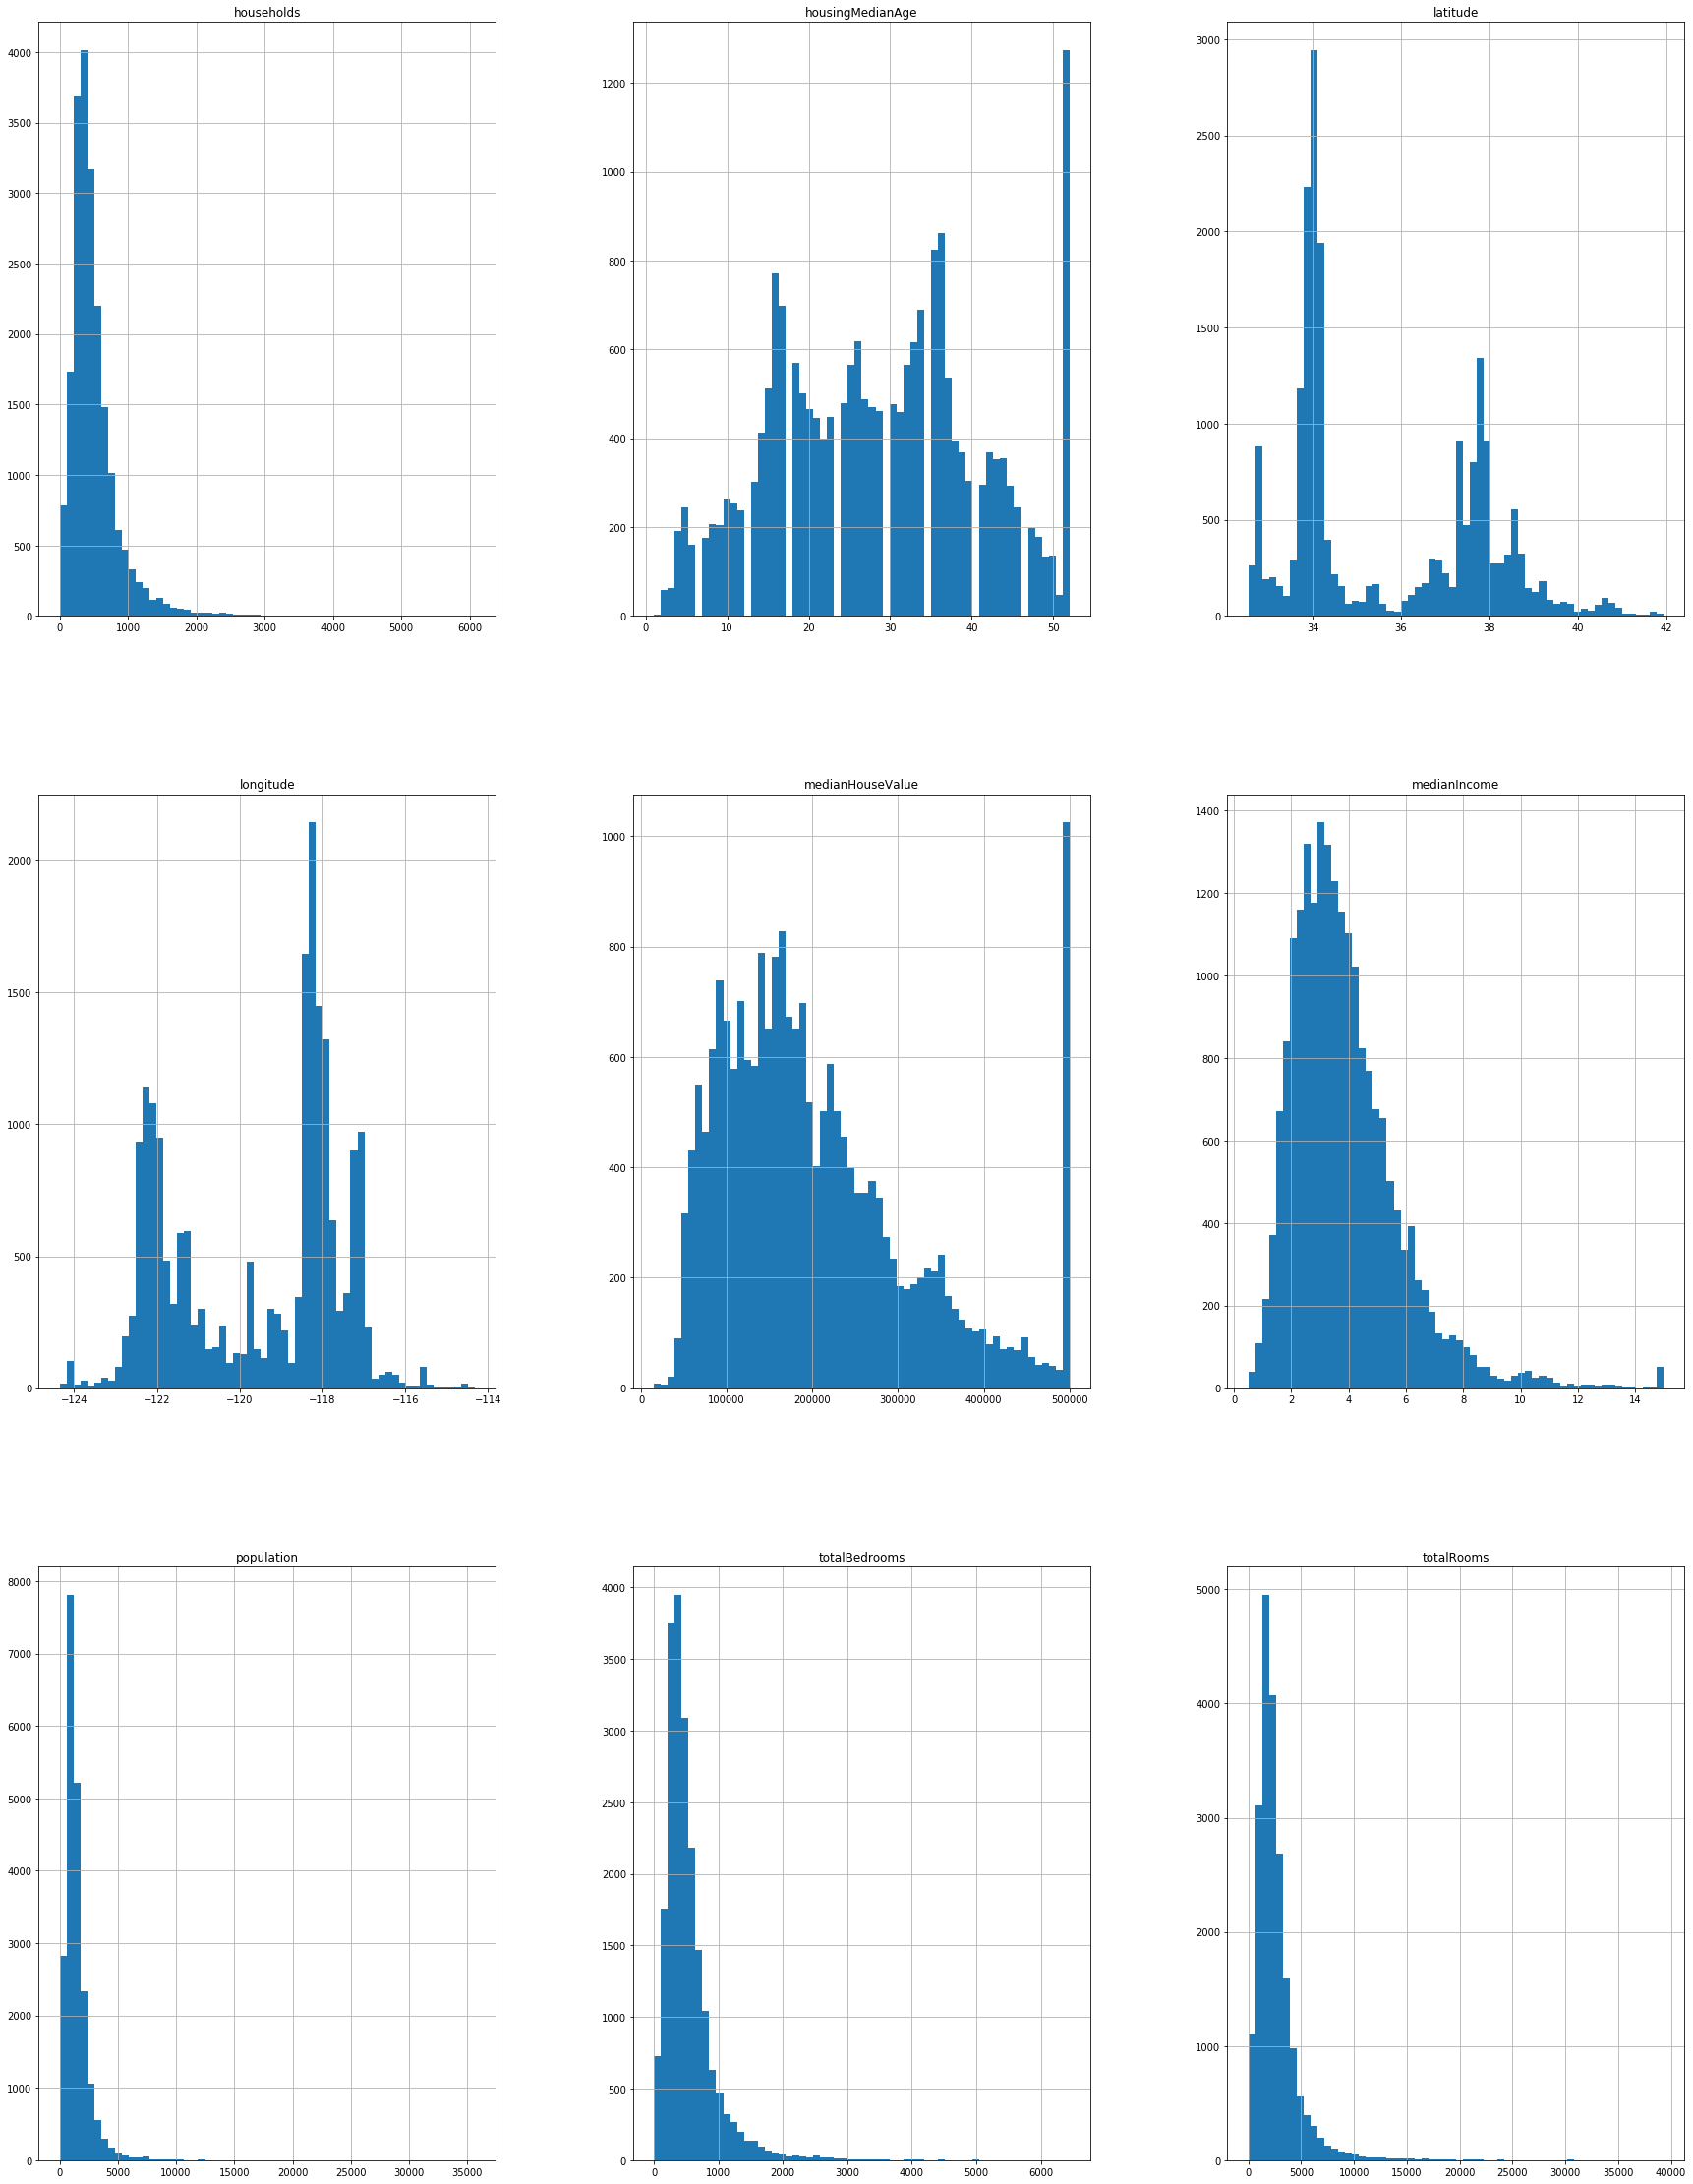

In [129]:
%matplotlib inline
data.hist(bins=60, figsize=(30, 40))
plt.show()

## Stratified sampling and test train split

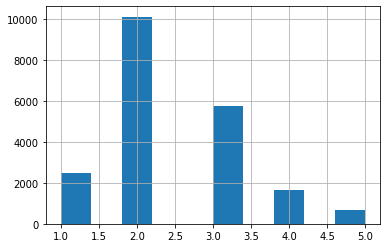

In [130]:
# stratified sampling

data['income_groups'] = pd.cut(data['medianIncome'],
                            [0,2,4,6,8,np.inf],
                            labels=[1,2,3,4,5])
data['income_groups'].hist()

In [131]:
from sklearn.model_selection import StratifiedShuffleSplit

shuffle_splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=59)
for train_i, test_i in shuffle_splitter.split(data, data['income_groups']):
    train_set = data.loc[train_i]
    test_set  = data.loc[test_i]

In [132]:
train_set['income_groups'].value_counts()/len(train_set['income_groups'])

2    0.489133
3    0.277409
1    0.119048
4    0.080980
5    0.033430
Name: income_groups, dtype: float64

In [133]:
test_set['income_groups'].value_counts()/len(test_set['income_groups'])

2    0.489180
3    0.277293
1    0.119025
4    0.081072
5    0.033430
Name: income_groups, dtype: float64

In [134]:
for col in (train_set, test_set):
        col.drop("income_groups", axis=1, inplace=True)

In [135]:
housing_data = train_set.copy()
housing_data.head()

longitude  latitude  housingMedianAge  totalRooms  totalBedrooms  \
10826    -117.93     33.65              27.0      1283.0          406.0   
4815     -118.29     34.04              41.0       659.0          291.0   
9420     -122.62     37.85              30.0       833.0          164.0   
19323    -122.97     38.50              44.0      3234.0          746.0   
16045    -122.45     37.71              45.0      2253.0          431.0   

       population  households  medianIncome  medianHouseValue  
10826      1063.0       376.0        2.7500          275000.0  
4815       1224.0       290.0        2.0817          132500.0  
9420        358.0       143.0        6.8198          493800.0  
19323      1112.0       470.0        1.9265          132700.0  
16045      1382.0       392.0        4.2562          221600.0

## Correlation

In [136]:
housing_data["rooms_per_household"] = housing_data["totalRooms"]/housing_data["households"]
housing_data["bedrooms_per_room"] = housing_data["totalBedrooms"]/housing_data["totalRooms"]
housing_data["population_per_household"]=housing_data["population"]/housing_data["households"]

In [137]:
corr_matrix = housing_data.corr()
corr_matrix['medianHouseValue']

longitude                  -0.042597
latitude                   -0.147840
housingMedianAge            0.102001
totalRooms                  0.136391
totalBedrooms               0.051785
population                 -0.024610
households                  0.067868
medianIncome                0.688792
medianHouseValue            1.000000
rooms_per_household         0.136369
bedrooms_per_room          -0.255071
population_per_household   -0.021256
Name: medianHouseValue, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11f590be0>,
      dtype=object)

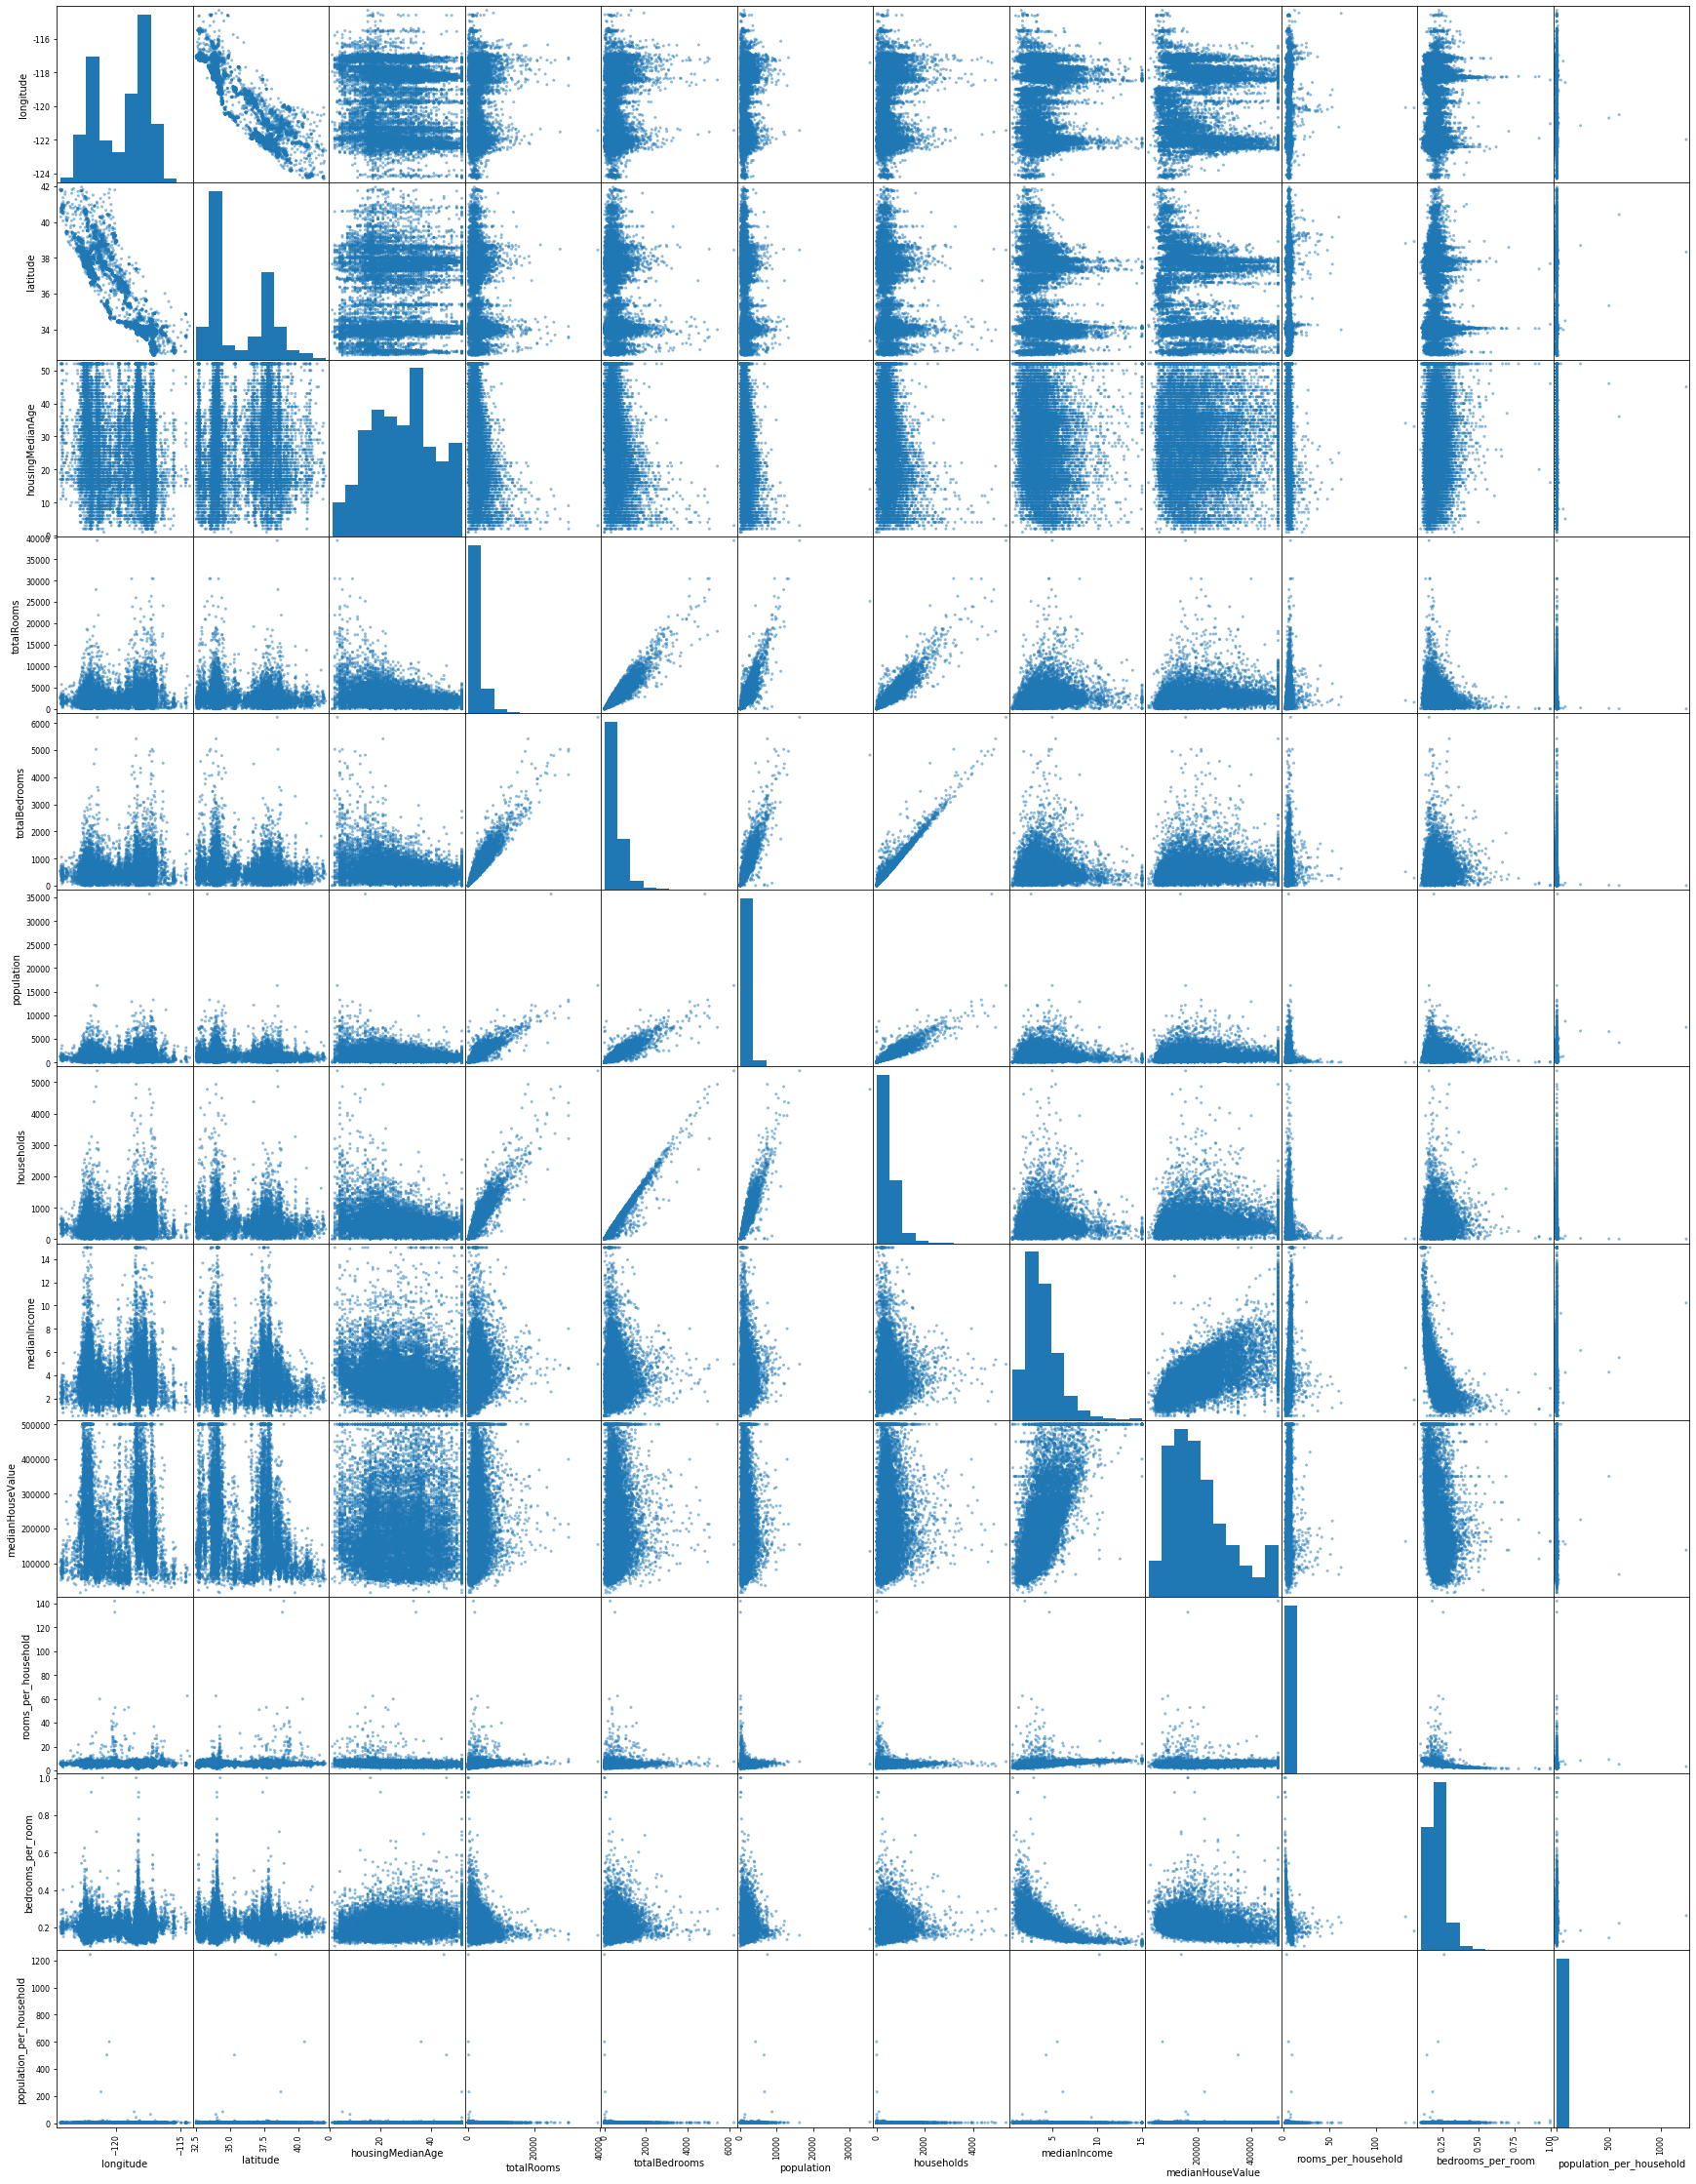

In [138]:
from pandas.plotting import scatter_matrix

cols = ["longitude", "latitude", "housingMedianAge",
        "totalRooms", "totalBedrooms", "population", 
        "households", "medianIncome", "medianHouseValue", 
        "rooms_per_household", "bedrooms_per_room", 
        "population_per_household"
        ]
scatter_matrix(housing_data[cols], figsize=(30, 40))

In [139]:
labels = housing_data['medianHouseValue'].copy()
labels.head()

10826    275000.0
4815     132500.0
9420     493800.0
19323    132700.0
16045    221600.0
Name: medianHouseValue, dtype: float64

In [140]:
housing_data = housing_data.drop("medianHouseValue", axis=1)
housing_data.head()

longitude  latitude  housingMedianAge  totalRooms  totalBedrooms  \
10826    -117.93     33.65              27.0      1283.0          406.0   
4815     -118.29     34.04              41.0       659.0          291.0   
9420     -122.62     37.85              30.0       833.0          164.0   
19323    -122.97     38.50              44.0      3234.0          746.0   
16045    -122.45     37.71              45.0      2253.0          431.0   

       population  households  medianIncome  rooms_per_household  \
10826      1063.0       376.0        2.7500             3.412234   
4815       1224.0       290.0        2.0817             2.272414   
9420        358.0       143.0        6.8198             5.825175   
19323      1112.0       470.0        1.9265             6.880851   
16045      1382.0       392.0        4.2562             5.747449   

       bedrooms_per_room  population_per_household  
10826           0.316446                  2.827128  
4815            0.441578                  4.220690  
9420            0.196879                  2.503497  
19323           0.230674                  2.365957  
16045           0.191300                  3.525510

## Data Transformation

In [141]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

pipeline = Pipeline(
    [
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ]
)

housing_data_copy = housing_data.copy()
housing_data_transformed = pipeline.fit_transform(housing_data)

In [142]:
housing_data_transformed = pd.DataFrame(housing_data_transformed, columns=housing_data_copy.columns,
                          index=housing_data_copy.index)

In [143]:
housing_data_transformed

longitude  latitude  housingMedianAge  totalRooms  totalBedrooms  \
10826   0.819737 -0.929644         -0.130704   -0.630747      -0.317130   
4815    0.640096 -0.746961          0.981525   -0.922284      -0.593781   
9420   -1.520589  1.037713          0.107631   -0.840990      -0.899300   
19323  -1.695241  1.342185          1.219860    0.280775       0.500794   
16045  -1.435759  0.972135          1.299305   -0.177555      -0.256989   
...          ...       ...               ...         ...            ...   
18319  -1.271088  0.840977          0.345966    0.293857       0.313152   
18558  -1.236157  0.620821          0.107631   -0.776515      -0.848781   
20050   0.131112  0.166455         -0.210148   -0.548051      -0.533640   
17760  -1.126377  0.794136         -0.130704    0.230784       0.173624   
20267   0.190993 -0.672014         -0.845708    0.461117       0.755794   

       population  households  medianIncome  rooms_per_household  \
10826   -0.327604   -0.326749     -0.586675            -0.764396   
4815    -0.182659   -0.555202     -0.936816            -1.193122   
9420    -0.962299   -0.945698      1.545607             0.143194   
19323   -0.283490   -0.077044     -1.018130             0.540270   
16045   -0.040415   -0.284246      0.202465             0.113958   
...           ...         ...           ...                  ...   
18319   -0.014307    0.337360      0.757724            -0.087870   
18558   -0.704820   -0.866005      0.175378             0.063281   
20050   -0.492355   -0.565828     -1.310953            -0.127728   
17760    1.647604    0.278919      0.400038            -0.100550   
20267    1.570181    0.743795     -0.277086            -0.299965   

       bedrooms_per_room  population_per_household  
10826           1.766493                 -0.024674  
4815            3.910925                  0.087787  
9420           -0.282566                 -0.050791  
19323           0.296596                 -0.061891  
16045          -0.378162                  0.031686  
...                  ...                       ...  
18319          -0.147119                 -0.070926  
18558          -0.391448                  0.047587  
20050           0.052634                 -0.004515  
17760          -0.313474                  0.182344  
20267           0.376885                  0.075675  

[14448 rows x 11 columns]

In [2]:
import tensorflow

ModuleNotFoundError: No module named 'tensorflow'